
## Predict US Elections

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [ ]:
#Reading the csv file for Trump related tweets
trump = pd.read_csv("Trumpall2.csv")
trump.head()

,user,text
0,manny_rosen,@sanofi please tell us how many shares the Cr...
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P..."
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...
3,seyedebrahimi_m,Mr. Trump! Wake Up! Most of the comments bel...
4,James09254677,After 4 years you think you would have figure...


In [ ]:
#Reading the csv file for Biden related tweets
biden= pd.read_csv("Bidenall2.csv")
biden.head()

,user,text
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...
2,OldlaceA,@JoeBiden So did Lying Barr
3,penblogger,@JoeBiden It's clear you didnt compose this tw...
4,Aquarian0264,@JoeBiden I will vote in person thank you.


In [1]:
#Importing textblob library
from textblob import TextBlob

In [ ]:
#Sentiment Analysis using Textblob for Trump
tb1 = TextBlob(trump["text"][10])
print("Donald Trump :",tb1.sentiment)

Donald Trump : Sentiment(polarity=0.15, subjectivity=0.3125)


In [ ]:
#Sentiment Analysis using Textblob for Biden
tb2 = TextBlob(biden["text"][500])
print("Joe Biden :",tb2.sentiment)

Joe Biden : Sentiment(polarity=0.6, subjectivity=0.9)


In [ ]:
#Defining the functon to return the sentiment polarity
def findPoll(review):
    return TextBlob(review).sentiment.polarity

In [ ]:
#Setting the centiment polarity column in  Dataframe Trump
trump["Sentiment Polarity"] = trump["text"].apply(findPoll)
print(trump.head())

              user  ... Sentiment Polarity
0      manny_rosen  ...               0.05
1        osi_abdul  ...               0.00
2          Patsyrw  ...              -0.50
3  seyedebrahimi_m  ...               0.50
4    James09254677  ...               0.00

[5 rows x 3 columns]


In [ ]:
#Setting the centiment polarity column in  Dataframe Biden
biden["Sentiment Polarity"] = biden["text"].apply(findPoll)
print(biden.head())

           user  ... Sentiment Polarity
0   MarkHodder3  ...               0.00
1    K87327961G  ...               0.00
2      OldlaceA  ...               0.00
3    penblogger  ...               0.05
4  Aquarian0264  ...               0.00

[5 rows x 3 columns]


In [ ]:
#setting the expression for each data in a new column for Trump
trump["Opinion Label"] = np.where(trump["Sentiment Polarity"]>0, "positive", "negative")
trump["Opinion Label"][trump["Sentiment Polarity"]==0]="Neutral"
print(trump.head())

              user  ... Opinion Label
0      manny_rosen  ...      positive
1        osi_abdul  ...       Neutral
2          Patsyrw  ...      negative
3  seyedebrahimi_m  ...      positive
4    James09254677  ...       Neutral

[5 rows x 4 columns]


In [ ]:
#setting the expression for each data in a new column for Biden
biden["Opinion Label"] = np.where(biden["Sentiment Polarity"]>0, "positive", "negative")
biden["Opinion Label"][trump["Sentiment Polarity"]==0]="Neutral"
print(biden.head())

           user  ... Opinion Label
0   MarkHodder3  ...      negative
1    K87327961G  ...       Neutral
2      OldlaceA  ...      negative
3    penblogger  ...      positive
4  Aquarian0264  ...       Neutral

[5 rows x 4 columns]


In [ ]:
#We are dropping the data with neutral tweets for Trump in reviews1
reviews1 = trump[trump['Sentiment Polarity'] == 0.0000]
cond1=trump['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
trump.drop(trump[cond1].index, inplace = True)
print(trump.shape)

(1324, 4)


In [ ]:
#We are dropping the data with neutral tweets for Biden in reviews2
reviews2 = biden[biden['Sentiment Polarity'] == 0.0000]
cond2=biden['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
biden.drop(biden[cond2].index, inplace = True)
print(biden.shape)

(1031, 4)


In [ ]:
#Balancing both the datsets
#For Trump dataset
np.random.seed(10)
remove=324
dropIndices = np.random.choice(trump.index, remove, replace=False)
df_trump = trump.drop(dropIndices)
print("Shape of trump Subset :",df_trump.shape)

#For Biden datset
np.random.seed(10)
remove =31
dropIndices = np.random.choice(biden.index, remove, replace=False)
df_biden = biden.drop(dropIndices)
print("Shape of Biden Subset :",df_biden.shape)

Shape of trump Subset : (1000, 4)
Shape of Biden Subset : (1000, 4)


In [ ]:
#Analyzing the number of positive and negative sentiments in Trump Data
count_Trump = df_trump.groupby('Opinion Label').count()
negative_percentage1 = (count_Trump['Sentiment Polarity'][0]/1000)*10
positive_percentage1 = (count_Trump['Sentiment Polarity'][1]/1000)*100

In [ ]:
#Analyzing the number of positive and negative sentiments in Biden Data
count_Biden = df_biden.groupby('Opinion Label').count()
negative_percentage2 = (count_Biden['Sentiment Polarity'][0]/1000)*10
positive_percentage2 = (count_Biden['Sentiment Polarity'][1]/1000)*100

In [ ]:
#Setting up the data for plotting
Politicians = ['Joe Biden', 'Donald Trump']
lis_pos = [positive_percentage1, positive_percentage2]
lis_neg = [negative_percentage1, negative_percentage2]

In [3]:
#Importing matplotlib library
import matplotlib.pyplot as plt

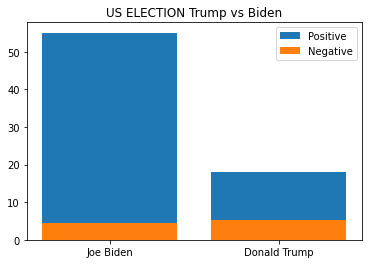

In [ ]:
#Plotting the bar graph using Matplotlib for Trump vs Biden
plt.bar(x=Politicians,height=lis_pos,label="Positive")
plt.bar(x=Politicians,height=lis_neg,label="Negative")
plt.legend()
plt.title("US ELECTION Trump vs Biden")
plt.show()